In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# generate 3D data
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
xx, yy = np.meshgrid(x, y)
zz = (0.4 ** 2 - (0.6 - (xx ** 2 + yy ** 2) ** 0.5) ** 2) ** 0.5
print(xx.shape, yy.shape, zz.shape)

(200, 200) (200, 200) (200, 200)


C:\Users\vladimir jurien\AppData\Local\Temp\ipykernel_45452\1550489594.py:5: RuntimeWarning: invalid value encountered in sqrt
  zz = (0.4 ** 2 - (0.6 - (xx ** 2 + yy ** 2) ** 0.5) ** 2) ** 0.5


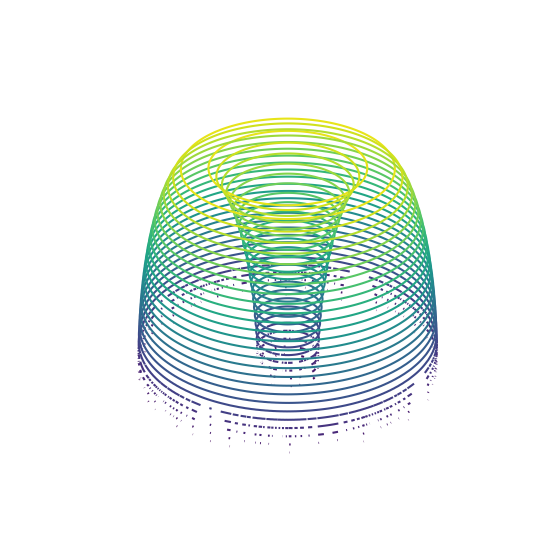

In [17]:
# make a 3D plot
from mpl_toolkits.mplot3d import Axes3D

# create 3D axes
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

# use pyplot contour function
ax.contour(xx, yy, zz, 30)

# remove axis
ax.axis('off')

plt.show()

c:\Users\vladimir jurien\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


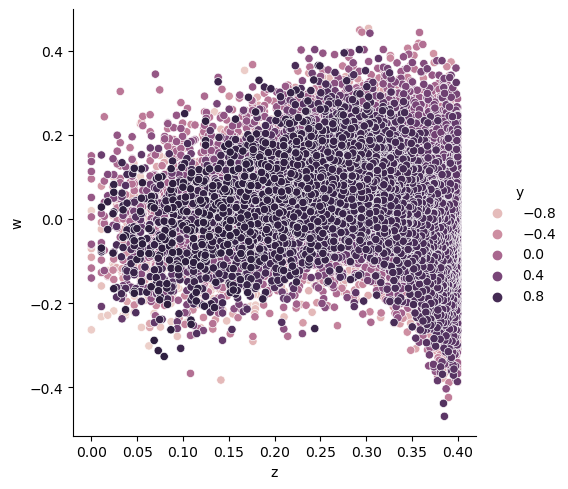

In [18]:
# import seaborn
import seaborn as sns

# create a dataframe, converting the 2D arrays to 1D using np.ravel
data = pd.DataFrame({
    'x': np.ravel(xx),
    'y': np.ravel(yy),
    'z': np.ravel(zz)
})

# create a new column w
data['w'] =  np.sin(10 * (data['x'] ** 2 + data['y'] ** 2)) / 10

# add random noise to w column
data['w'] = data['w'].apply(lambda x: x + np.random.normal(0, 0.1))

# plot using sns.relplot
sns.relplot(data=data, x='z', y='w', hue='y')

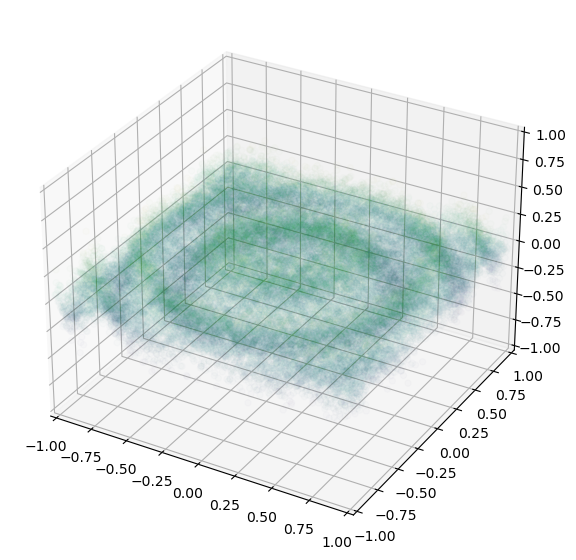

In [19]:
# make another 3D plot
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

# use scatter to plot data this time, using matplotlib, give transparency of 0.1
# using the alpha keyword argument
ax.scatter(data['x'], data['y'], data['w'], c=data['w'],alpha=0.01)

# set all the limits to [-1, 1]
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])


plt.show()

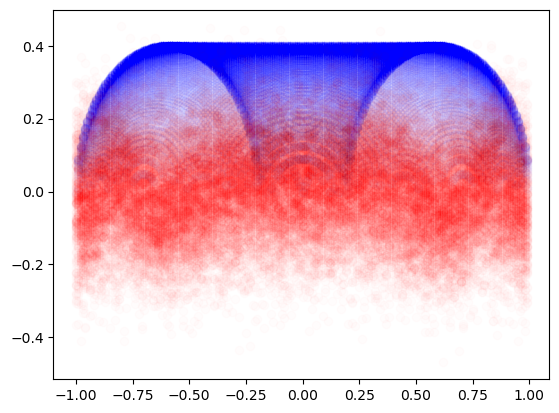

In [20]:
# plot z vs x, using blue dots with transparency of 0.01
plt.plot(data['x'], data['z'], 'bo', alpha = 0.01)

# do the same for w vs y but with red dots
plt.plot(data['y'], data['w'], 'ro', alpha = 0.01)

c:\Users\vladimir jurien\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


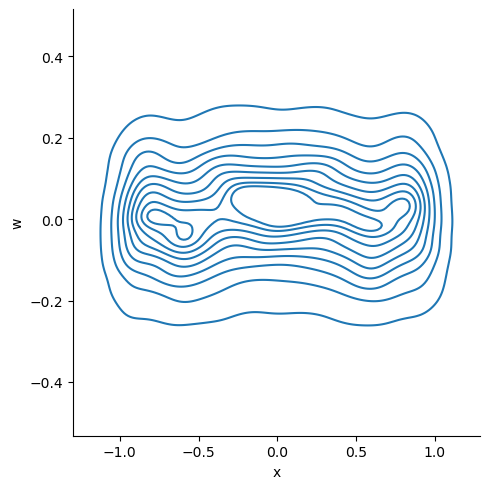

In [21]:
# use sns displot to plot a contour map of of w vs x
sns.displot(data=data, x='x', y='w', kind='kde')

In [24]:
# In this section we will revisit the use of classes - making two classes a Component class and a Signal class
# The result will be the ability to sum up many sine and cosine waves, and then extract their features and plot their trace

from typing import List
import numpy as np
import scipy.fft

# create signal component class
class Component:
    def self(
        self, 
        coefficient: float, 
        frequency: float, 
        phase: float = 0, 
        offset: float = 0, 
        noise: float = 0, 
        kind='cos'
    ):
        "A sine or cosine wave"
        
        # set attributes
        self.coefficient = coefficient
        self.frequency = frequency
        self.phase = phase
        self.offset = offset
        self.noise = noise
        self.kind = kind
        
        if kind == 'cos':
            self.function = np.cos
            
        elif kind == 'sin':
            self.function = np.sin
            
        else:
            raise ValueError('kind must be "cos" or "sin"')
    
    # make __call__ method to generate the signal
    def __call__(self, x: np.ndarray) -> np.ndarray:
        signal = self.coefficient * self.function(self.frequency * x + self.phase) + self.offset
        signal = [i + self.noise * np.random.random() for i in signal]
        return np.array(signal)
    
# Create a sine component
class Sine(Component):
     def __init__(self, *args, **kwargs):
        super().__init__(kind='sin', *args, **kwargs)

        # create a cosine component
class Cosine(Component):
    def __init__(self, *args, **kwargs):
        super().__init__(kind='cos', *args, **kwargs)

        # signal generation class
class Signal:
    def __init__(self, components: List[Component]):
        """A container for a list of components"""
        if isinstance(components, list) and len(components) != 0:
            self.components = components
                    
        else:
            self.components = []
            
            # Do call in the same way as before
    def __call__(self, x: np.ndarray) -> np.ndarray:
                # get result of first component
        result = self.components[0](x)
                
        # loop over the rest
        for component in self.components[1:]:
            result = np.sum([result, component(x)], axis=0)
                
                # return result
        return result
            
            # add functionality to plot signal
    def plot(self, x: np.ndarray, ax: plt.Axes = None, plot_components: bool = False):
        if not ax:
             # create axes
            fig, ax = plt.subplots(figsize=(10, 5))
            ax.set_xlabel('Time')
            ax.set_ylabel('Signal')
                    
                # call self
        signal = self.__call__(x)
                
                # plot signal on axes
        ax.plot(x, signal, 'k-')
                
                # ADVANCED: make option for plotting the individual components
        if plot_components:
            for component in self.components:
                ax.plot(x, component(x), '--')
            
            # get fourier transform
    def fourier(self, x: np.ndarray) -> List[np.ndarray]:
        signal = self.__call__(x)
        N = len(x)
        delta = x[1] - x[0]
        # create the frequency axis
        xt = np.linspace(0.0, 1.0 / (2.0 * delta), N // 2)
                
        # do fourier transform and normalise
        yt = scipy.fft.fft(signal)
        yt = 2.0/N * np.abs(yt[0:N//2])
                
        return xt, yt


In [ ]:
import matplotlib.pyplot as plt

class Component:
            def __init__(
                self, 
                coefficient: float, 
                frequency: float, 
                phase: float = 0, 
                offset: float = 0, 
                noise: float = 0, 
                kind='cos'
            ):
                "A sine or cosine wave"
                
                # set attributes
                self.coefficient = coefficient
                self.frequency = frequency
                self.phase = phase
                self.offset = offset
                self.noise = noise
                self.kind = kind
                
                if kind == 'cos':
                    self.function = np.cos
                    
                elif kind == 'sin':
                    self.function = np.sin
                    
                else:
                    raise ValueError('kind must be "cos" or "sin"')
            
            # make __call__ method to generate the signal
            def __call__(self, x: np.ndarray) -> np.ndarray:
                signal = self.coefficient * self.function(self.frequency * x + self.phase) + self.offset
                signal = [i + self.noise * np.random.random() for i in signal]
                return np.array(signal)
            
        

In [26]:
### - TO TEST THE CLASSES, RUN THIS CODE AND SEE WHAT HAPPENS
### - WHEN YOU HAVE SOMETHING THAT WORKS, EXPERIMENT WITH DIFFERENT SIGNAL COMBINATIONS

# Generate signal
signal = Signal([
    Cosine(coefficient=1, frequency=440, noise=5.0),
    Sine(coefficient=2, frequency=700, offset=-0.5),
    Sine(coefficient=2, frequency=350, offset=-10),
    Sine(coefficient=1, frequency=30, phase=0.1),
    Cosine(coefficient=2, frequency=200, offset=0.5),
    Sine(coefficient=5, frequency=3300, phase=0.1, noise=5.0),
    Sine(coefficient=0.5, frequency=20, phase=-0.1, noise=0.2)
])

# plot signal
signal.plot(np.arange(0, 0.5, 0.001), plot_components=True)

# plot fourier transform
xt, yt = signal.fourier(np.arange(0, 0.5, 0.001))
fig, ax = plt.subplots()
ax.plot(xt, yt)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
plt.show()

TypeError: object.__init__() takes exactly one argument (the instance to initialize)